In [1]:
# Import core libraries for analysis and plotting.
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Display settings to make outputs more readable.
pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid", font_scale=1.05)
plt.rcParams['figure.dpi'] = 100

In [ ]:
# Loading the DataFrame
df = pd.read_csv('CollegePlacement.csv')

In [ ]:
# Dataset Review:

def Summarize_dataset(df):
  print("\n---Dataset Strucutre---")
  print(f'The dataset has {df.shape[0]} rows.')
  print(f'The dataset has {df.shape[1]} Columns.')
  print("\n--Data Types--")
  print(df.dtypes)

def check_null_values(df):
  print("\n---Missing Values---")
  print(df.isna().sum())

def check_duplicated_values(df):
  print(f'\n--Duplicated Values---')
  print(f"The Number Of Duplicated Rows:{df.duplicated().sum()}")


# Example Usage
Summarize_dataset(df)
check_null_values(df)
check_duplicated_values(df)


---Dataset Strucutre---
The dataset has 10000 rows.
The dataset has 10 Columns.

--Data Types--
College_ID                 object
IQ                          int64
Prev_Sem_Result           float64
CGPA                      float64
Academic_Performance        int64
Internship_Experience      object
Extra_Curricular_Score      int64
Communication_Skills        int64
Projects_Completed          int64
Placement                  object
dtype: object

---Missing Values---
College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

--Duplicated Values---
The Number Of Duplicated Rows:0


In [ ]:
# Dropping 'College_ID' since it’s only a unique identifier and adds no analytical value
df.drop('College_ID', axis=1, inplace=True)

In [ ]:
# Function to separate numeric and categorical features based on their data types
def dtype_feature(df):
  num_cols_list = []
  cat_cols_list = []
  for cols, dtype in df.dtypes.items():
    if (dtype == 'int64') or (dtype == 'float64'):
      num_cols_list.append(cols)
    else:
      cat_cols_list.append(cols)
  print("\n===== Feature Types =====")
  print("Numeric Columns:", num_cols_list)
  print("Categorical Columns:", cat_cols_list)
  return num_cols_list, cat_cols_list

# Example Usage
num_cols_list, cat_cols_list = dtype_feature(df)


===== Feature Types =====
Numeric Columns: ['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance', 'Extra_Curricular_Score', 'Communication_Skills', 'Projects_Completed']
Categorical Columns: ['Internship_Experience', 'Placement']



---Numeric Features Summary---


,count,mean,std,min,25%,50%,75%,max
IQ,10000.0,99.471800,15.053101,41.00,89.00,99.00,110.00,158.00
Prev_Sem_Result,10000.0,7.535673,1.447519,5.00,6.29,7.56,8.79,10.00
CGPA,10000.0,7.532379,1.470141,4.54,6.29,7.55,8.77,10.46
Academic_Performance,10000.0,5.546400,2.873477,1.00,3.00,6.00,8.00,10.00
Extra_Curricular_Score,10000.0,4.970900,3.160103,0.00,2.00,5.00,8.00,10.00
Communication_Skills,10000.0,5.561800,2.900866,1.00,3.00,6.00,8.00,10.00
Projects_Completed,10000.0,2.513400,1.715959,0.00,1.00,3.00,4.00,5.00


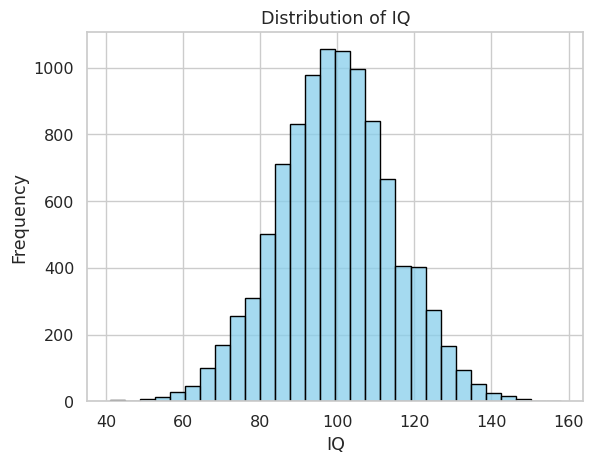

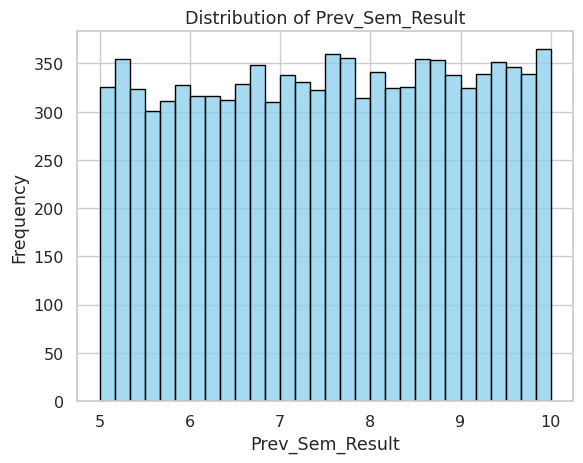

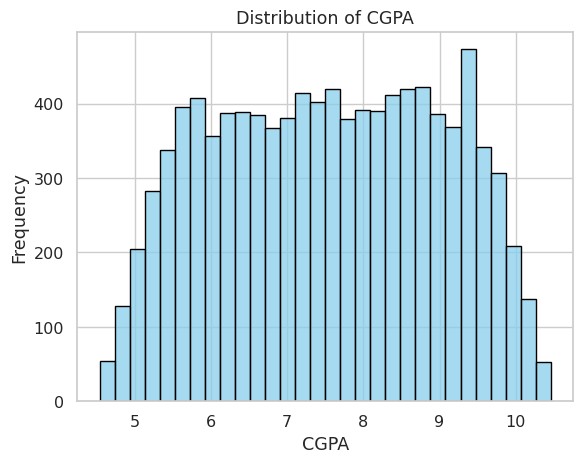

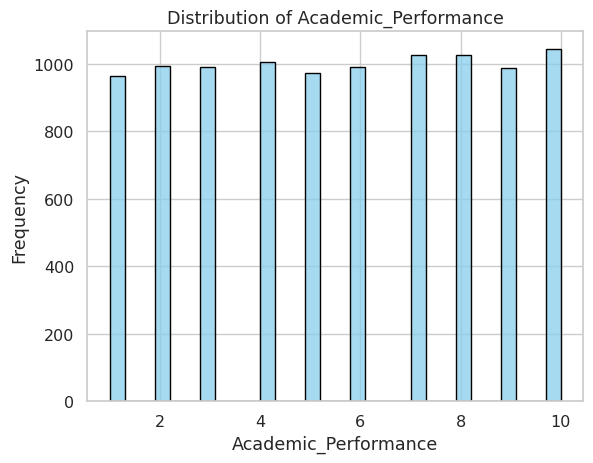

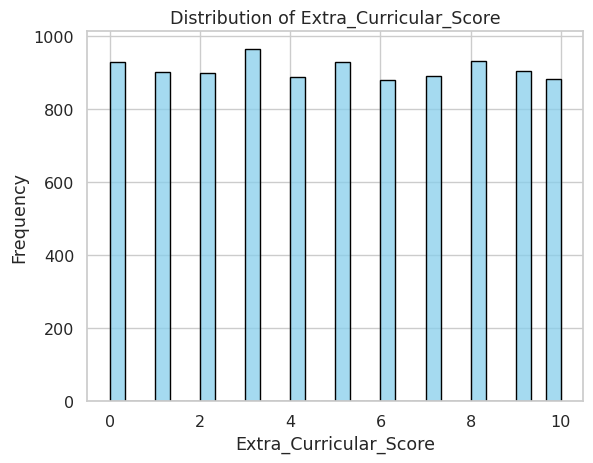

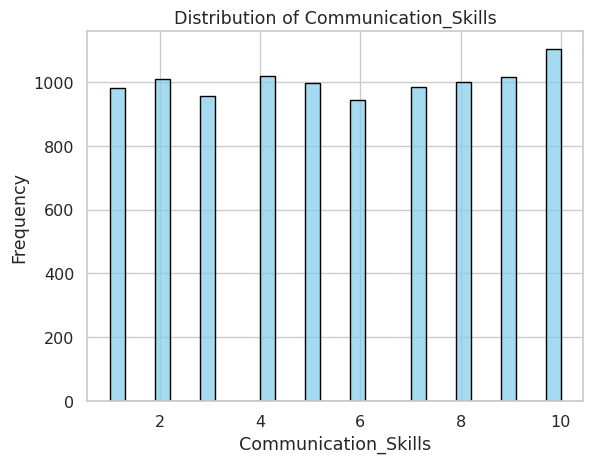

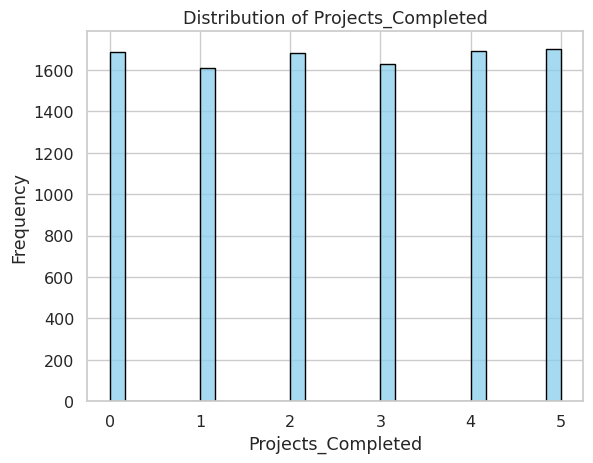

In [ ]:
# Numeric Feature Analysis

def numeric_analysis(df):
  print("\n---Numeric Features Summary---")
  display(df.describe().T)
  print('\n')

# Checking Distribution of All Numeric Features to help identify data spread, skewness, and potential outliers.

def Distribution_plots(df, num_cols_list):
  for col in num_cols_list:
        plt.figure()
        sns.histplot(data=df, x=col, bins=30, color="skyblue", edgecolor="black")
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()
        print('\n')

# Example Usage
numeric_analysis(df)
Distribution_plots(df, num_cols_list)

Correlation Matrix of Numeric Columns:


,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
IQ,1.000000,-0.002640,-0.002859,-0.006827,-0.003458,-0.010896,0.014538
Prev_Sem_Result,-0.002640,1.000000,0.980768,-0.005765,0.009326,-0.017269,0.018434
CGPA,-0.002859,0.980768,1.000000,-0.002958,0.011441,-0.018242,0.020872
Academic_Performance,-0.006827,-0.005765,-0.002958,1.000000,0.011774,-0.019733,-0.013148
Extra_Curricular_Score,-0.003458,0.009326,0.011441,0.011774,1.000000,0.003769,0.008122
Communication_Skills,-0.010896,-0.017269,-0.018242,-0.019733,0.003769,1.000000,-0.004486
Projects_Completed,0.014538,0.018434,0.020872,-0.013148,0.008122,-0.004486,1.000000


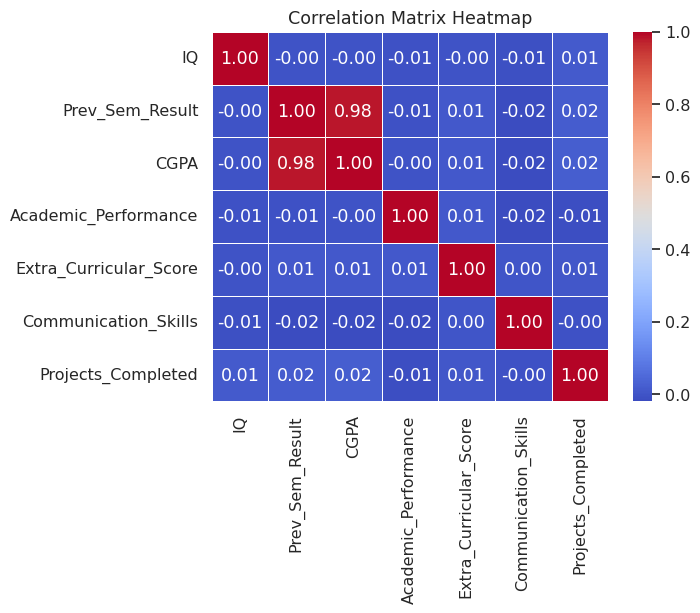

In [ ]:
# Correlation Analysis Between Numeric Features (Placement & Internship Excluded)

def correlation_numeric(df, num_cols_list):
  if len(num_cols_list) > 1:
    corr = df[num_cols_list].corr()
    print(f"Correlation Matrix of Numeric Columns:")
    display(corr)
    print("\n")
    plt.figure()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Matrix Heatmap')
    plt.show()

# Example Usage
correlation_numeric(df, num_cols_list)



---Groupby Of Placement with IQ---
  Placement          IQ
0        No   97.552452
1       Yes  109.121760


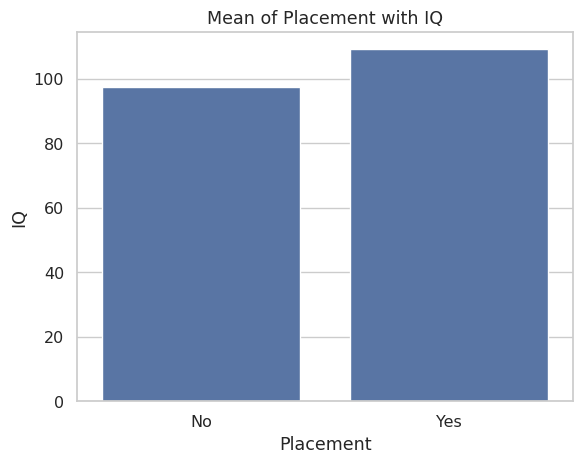


---Groupby Of Placement with Prev_Sem_Result---
  Placement  Prev_Sem_Result
0        No         7.330462
1       Yes         8.567420


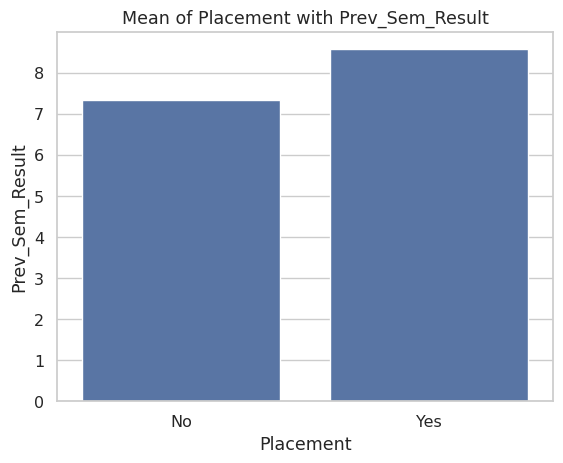


---Groupby Of Placement with CGPA---
  Placement      CGPA
0        No  7.321527
1       Yes  8.592483


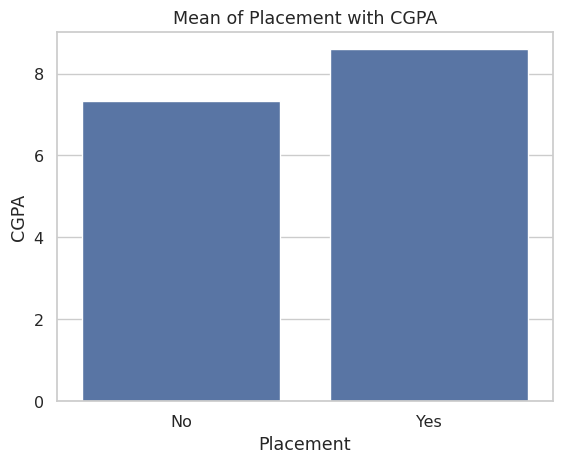


---Groupby Of Placement with Academic_Performance---
  Placement  Academic_Performance
0        No              5.565520
1       Yes              5.450271


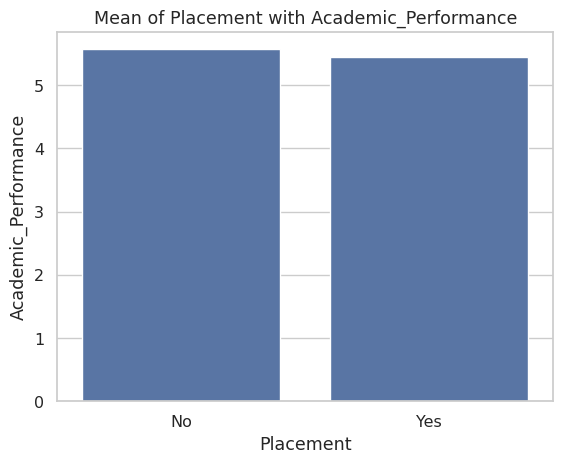


---Groupby Of Placement with Extra_Curricular_Score---
  Placement  Extra_Curricular_Score
0        No                4.977581
1       Yes                4.937312


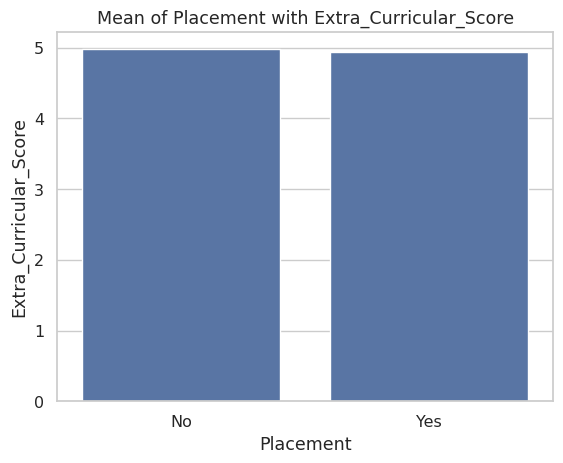


---Groupby Of Placement with Communication_Skills---
  Placement  Communication_Skills
0        No              5.143748
1       Yes              7.663653


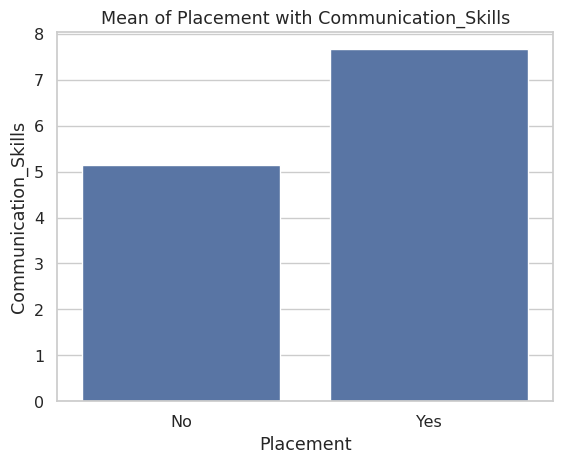


---Groupby Of Placement with Projects_Completed---
  Placement  Projects_Completed
0        No            2.346961
1       Yes            3.350211


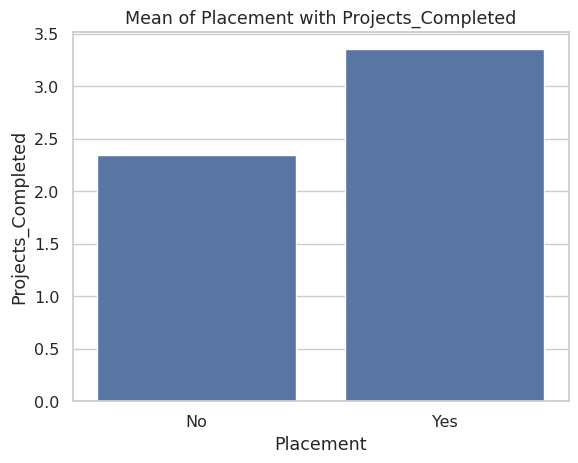

In [ ]:
# Mean Comparison of Numeric Features by Placement Status
def mean_bar_numeric (df, num_cols_list):
  for cols in df[num_cols_list]:
    mean_by_placement = df.groupby('Placement')[cols].mean().reset_index()
    print(f"\n---Groupby Of Placement with {cols}---")
    print(mean_by_placement)

    plt.figure()
    sns.barplot(x='Placement', y=cols, data=mean_by_placement)
    plt.title(f'Mean of Placement with {cols}')
    plt.xlabel("Placement")
    plt.ylabel(cols)
    plt.show()

# Example Usage
mean_bar_numeric(df, num_cols_list)

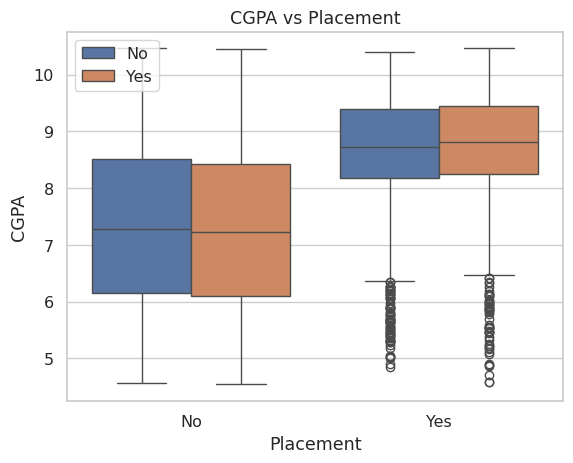

In [ ]:
# Boxplot of CGPA vs. Placement
plt.figure()
sns.boxplot(x=df['Placement'], y=df['CGPA'], hue="Internship_Experience", data=df)
plt.title("CGPA vs Placement")
plt.xlabel("Placement")
plt.ylabel("CGPA")
plt.legend(loc='upper left')
plt.show()

<Axes: xlabel='Placement', ylabel='count'>

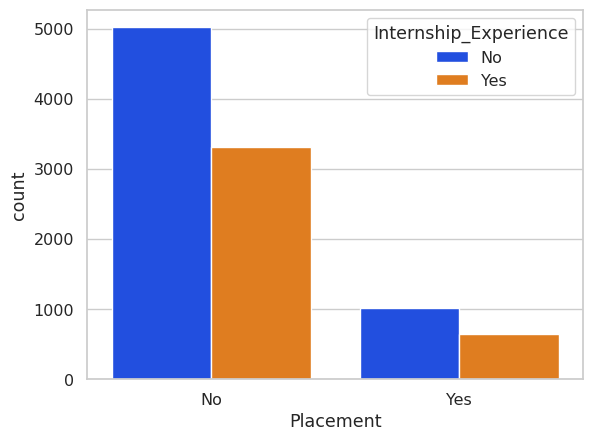

In [ ]:
# Countplot of Placement status with Internship Experience as hue
plt.figure()
sns.countplot(x=df["Placement"], hue="Internship_Experience", data=df, palette='bright')

The KDE Plot Of IQ:


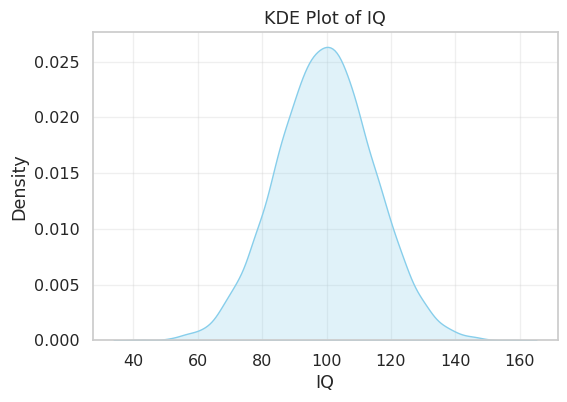



The KDE Plot Of Prev_Sem_Result:


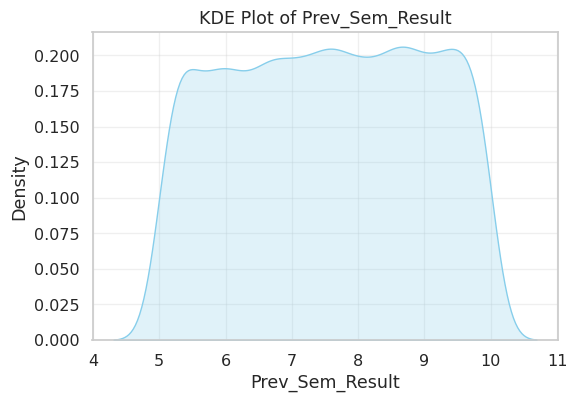



The KDE Plot Of CGPA:


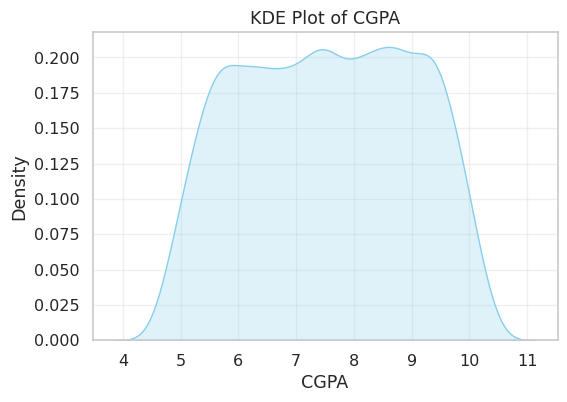



The KDE Plot Of Academic_Performance:


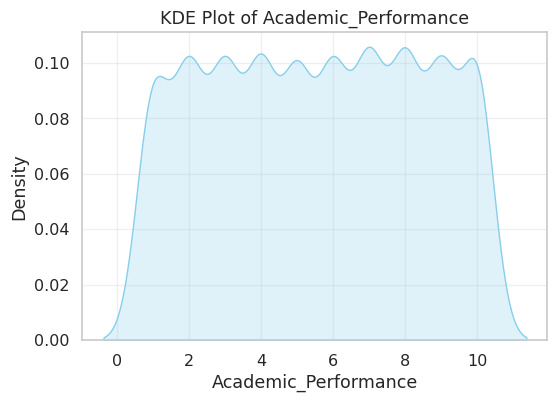



The KDE Plot Of Extra_Curricular_Score:


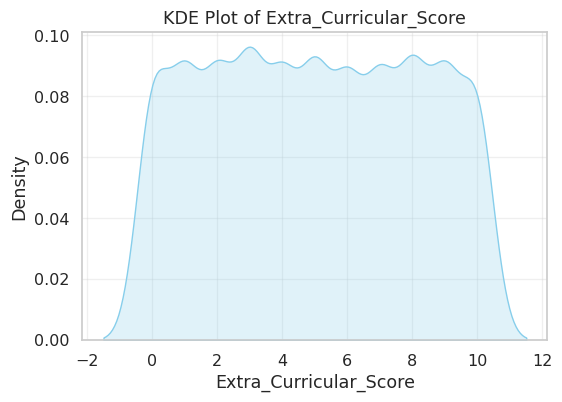



The KDE Plot Of Communication_Skills:


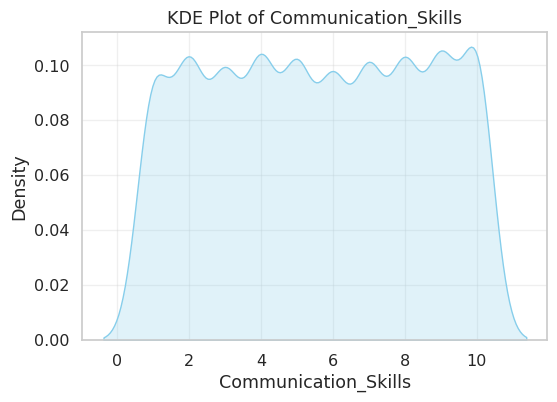



The KDE Plot Of Projects_Completed:


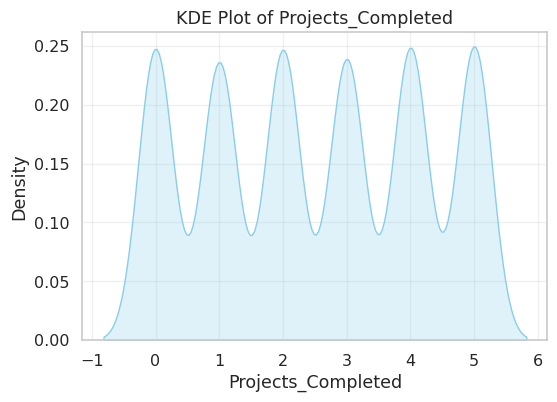

In [ ]:
# KDE plots for all numeric features to visualize their distribution shape and density

def kde_numeric (df, numeric_cols):
  for cols in numeric_cols:
    print(f"The KDE Plot Of {cols}:")
    plt.figure(figsize=(6, 4))
    sns.kdeplot(x=cols, data=df, fill=True, color='skyblue')
    plt.title(f"KDE Plot of {cols}")
    plt.xlabel(cols)
    plt.ylabel("Density")
    plt.grid(alpha=0.3)
    plt.show()
    print("\n")

# Example Usage
kde_numeric(df, num_cols_list)

The KDE Plot Of IQ:


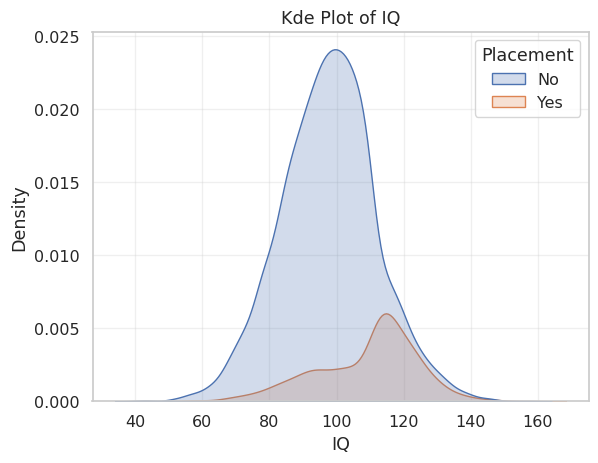



The KDE Plot Of Prev_Sem_Result:


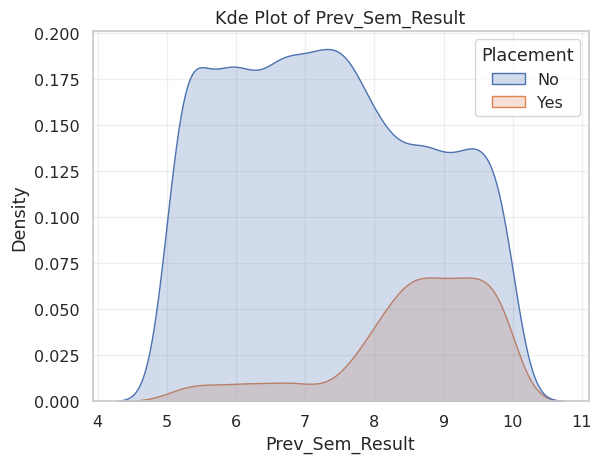



The KDE Plot Of CGPA:


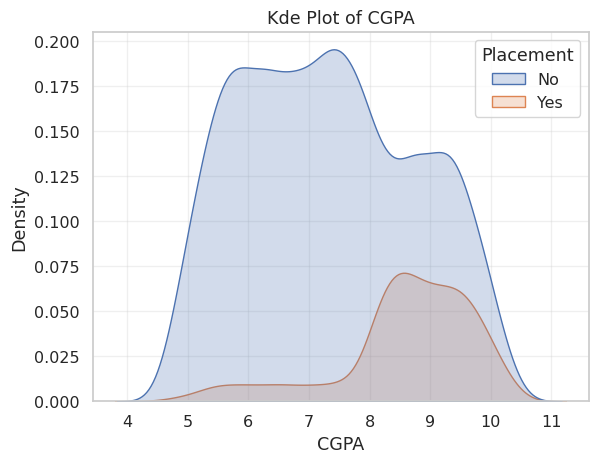



The KDE Plot Of Academic_Performance:


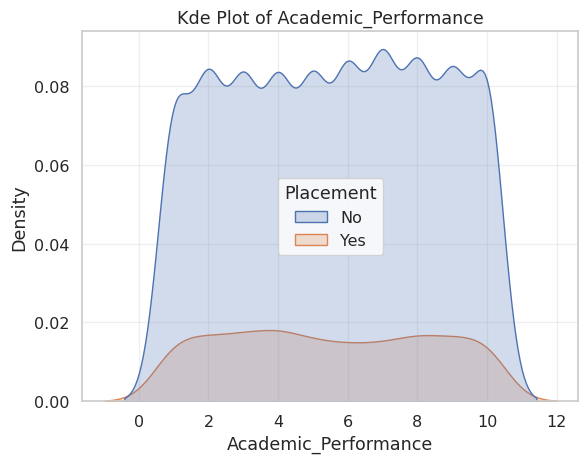



The KDE Plot Of Extra_Curricular_Score:


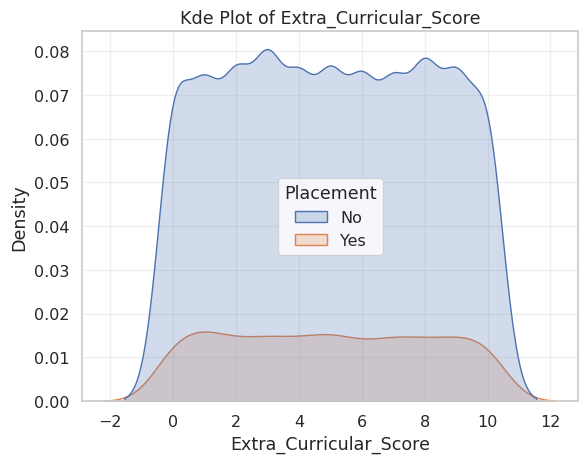



The KDE Plot Of Communication_Skills:


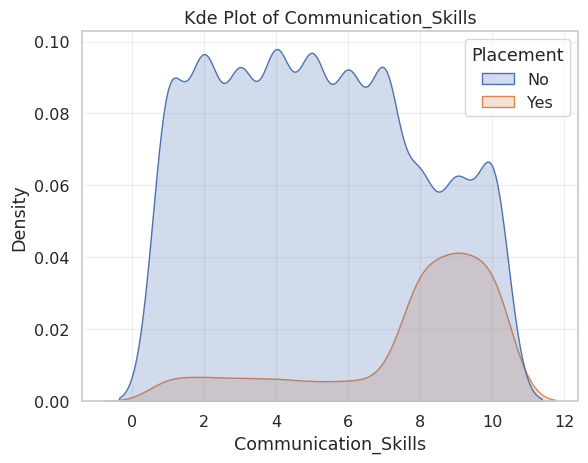



The KDE Plot Of Projects_Completed:


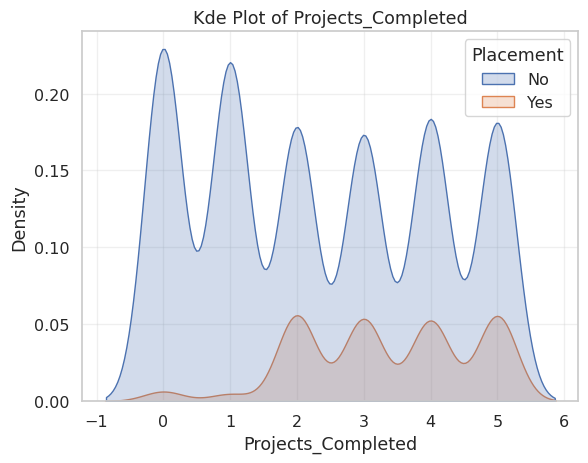

In [ ]:
# KDE plots for all numeric features with hue (Placement)
for cols in num_cols_list:
    print(f"The KDE Plot Of {cols}:")
    plt.figure()
    sns.kdeplot(
        x=cols,
        data=df,
        fill=True,
        label=cols,
        hue="Placement")
    plt.title(f"Kde Plot of {cols}")
    plt.grid(alpha=0.3)
    plt.show()
    print("\n")

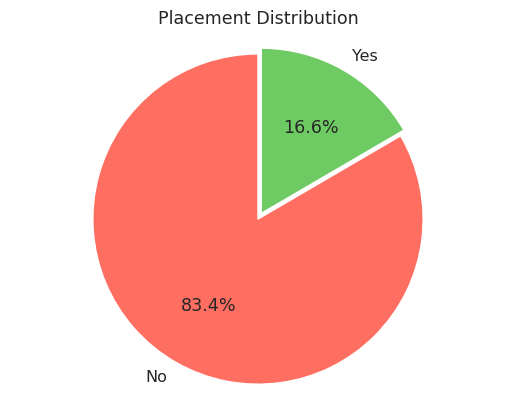

In [ ]:
# Pie Chart of Placement Distribution
Placement_count = df['Placement'].value_counts()
plt.figure()
plt.pie(
    Placement_count,
    labels=Placement_count.index,
    autopct = '%1.1f%%',
    startangle = 90,
    colors=['#FF6F61', '#6ECB63'],
    explode=(0.02, 0.02)
    )
plt.title('Placement Distribution')
plt.axis('equal')
plt.show()


In [ ]:
# Convert categorical binary columns (Yes/No) into numeric format (1/0) for analysis compatibility
for col in cat_cols_list:
  if df[col].dtype == 'object':
    df[col] = df[col].apply(lambda x: 1 if x == "Yes" else 0)
print(df[cat_cols_list])

      Internship_Experience  Placement
0                         0          0
1                         0          0
2                         0          0
3                         1          0
4                         0          0
...                     ...        ...
9995                      0          1
9996                      0          0
9997                      1          0
9998                      0          0
9999                      0          0

[10000 rows x 2 columns]


In [ ]:
# Checking which numeric features show the strongest correlation with placement outcome
Matrix_corr = df.corr()
Placement_corr = Matrix_corr['Placement'].drop("Placement").sort_values(ascending=False)
Placement_corr

,Placement
Communication_Skills,0.323155
CGPA,0.321607
Prev_Sem_Result,0.317896
IQ,0.285914
Projects_Completed,0.217499
Extra_Curricular_Score,-0.004740
Internship_Experience,-0.005841
Academic_Performance,-0.014920


/tmp/ipython-input-209017154.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


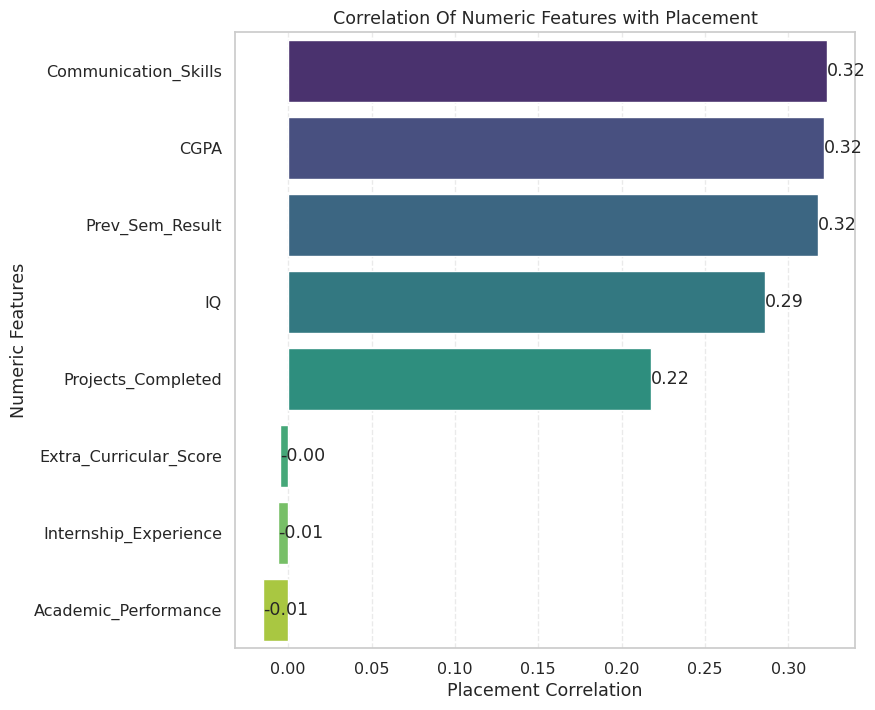

In [ ]:
# Visualizing correlation of numeric features with placement to highlight which variables influence outcomes most
plt.figure(figsize=(8, 8))
sns.barplot(
  x=Placement_corr.values,
  y=Placement_corr.index,
  palette='viridis'
  )
plt.title('Correlation Of Numeric Features with Placement')
plt.xlabel('Placement Correlation')
plt.ylabel('Numeric Features')
for i, val in enumerate(Placement_corr.values):
  plt.text(val, i, f"{val:.2f}", va='center')
plt.grid(True, linestyle="--", axis="x", alpha=0.4)
plt.show()


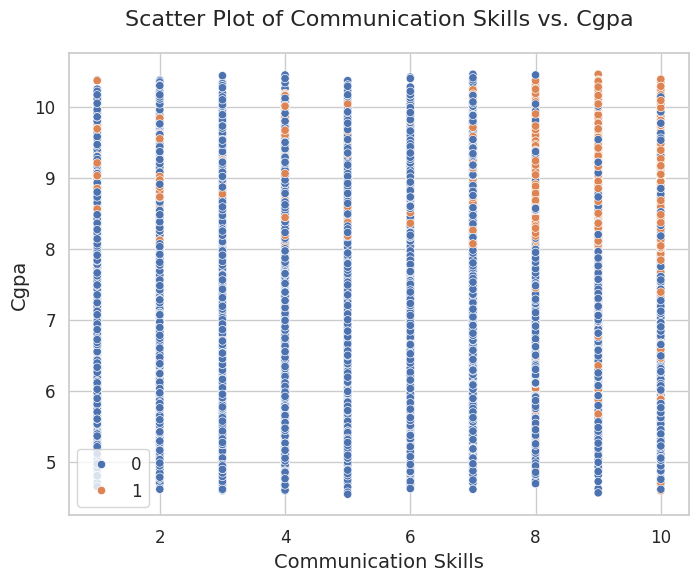

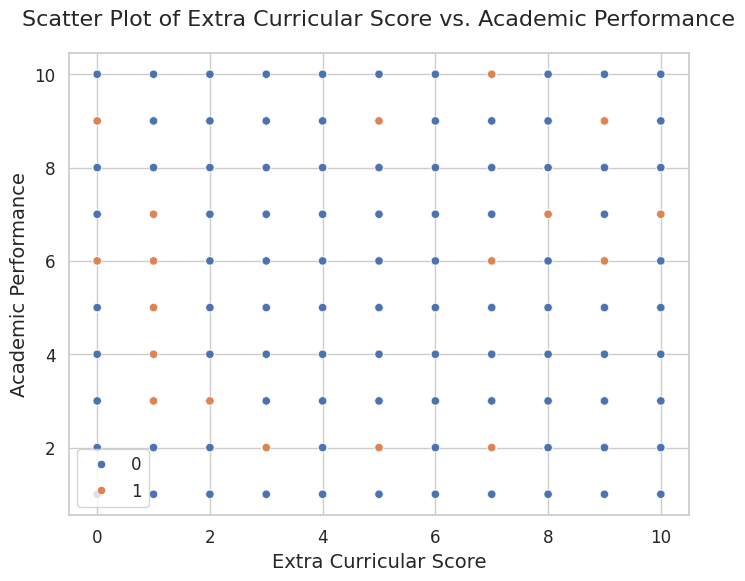

In [ ]:
, # Scatter plots showing relationships between key numeric skills and academic performance,
# colored by placement status to highlight performance patterns of placed vs. non-placed students

scatter_plot = {'Communication_Skills': 'CGPA',
                'Extra_Curricular_Score': 'Academic_Performance'
                }

for key, val in scatter_plot.items():
  sns.set_theme(style="whitegrid", font_scale=1.1)
  plt.figure(figsize=(8,6))
  sns.scatterplot(
        x=df[key],
        y=df[val],
        data=df,
        hue="Placement",
    )
  plt.title(f"Scatter Plot of {key.replace('_', ' ').title()} vs. {val.replace('_', ' ').title()}", fontsize=16, pad=20)
  plt.xlabel(f"{key.replace('_',' ').title()}", fontsize=14)
  plt.ylabel(f"{val.replace('_',' ').title()}", fontsize=14)
  plt.legend(loc='lower left')
  plt.show()
  print('\n')

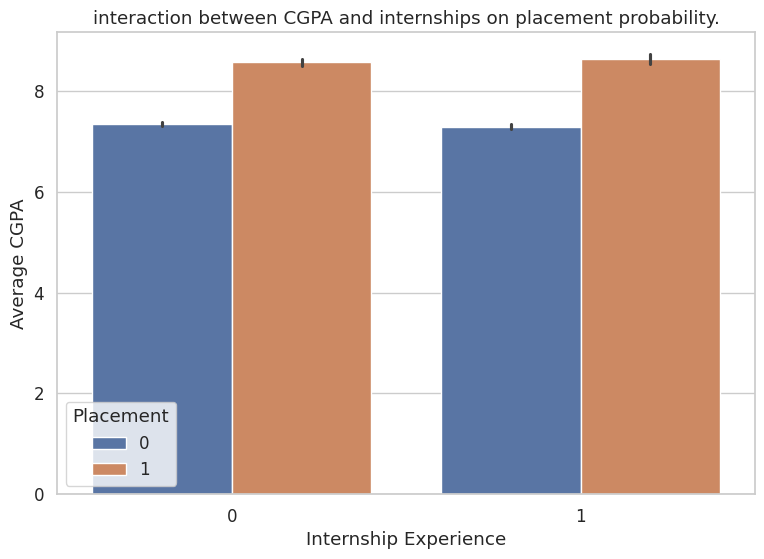

In [ ]:
# Visualizing interaction between CGPA and Internship Experience on placement probability
# This helps reveal if students with internships and higher CGPAs are more likely to be placed

sns.set_theme(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(9,6))
sns.barplot(x="Internship_Experience", y="CGPA", hue="Placement", data=df)
plt.title("interaction between CGPA and internships on placement probability.")
plt.xlabel("Internship Experience")
plt.ylabel("Average CGPA")
plt.show()

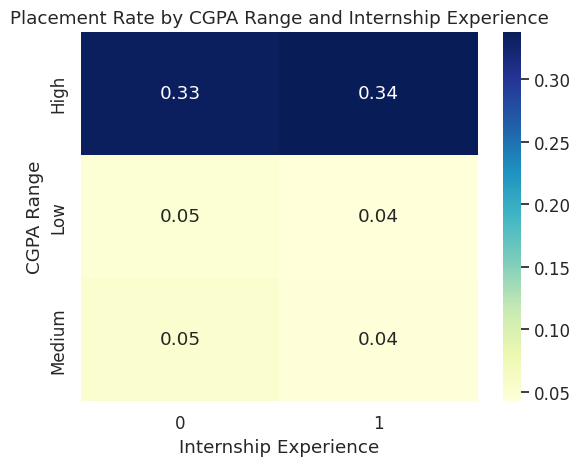

In [ ]:
# Heatmap showing how CGPA range and internship experience together affect placement rates
# CGPA is binned into Low, Medium, and High categories to reveal interaction patterns clearly

def CGPA_Internship_Placement_Relation(df):
  df['CGPA_Bins'] = df['CGPA'].apply(lambda cgpa: "Low" if cgpa < 7 else ("Medium" if cgpa < 8 else "High"))
  placement_relation = df.groupby(['CGPA_Bins', 'Internship_Experience'])['Placement'].mean().unstack()
  sns.set_theme(style="whitegrid", font_scale=1.1)
  plt.figure()
  sns.heatmap(data=placement_relation, annot=True, cmap='YlGnBu', fmt=".2f")
  plt.title('Placement Rate by CGPA Range and Internship Experience')
  plt.ylabel('CGPA Range')
  plt.xlabel('Internship Experience')
  plt.show()

# Example Usage
CGPA_Internship_Placement_Relation(df)

# Dropping the temporary CGPA_Bins column after visualization
df.drop("CGPA_Bins", axis=1, inplace=True)


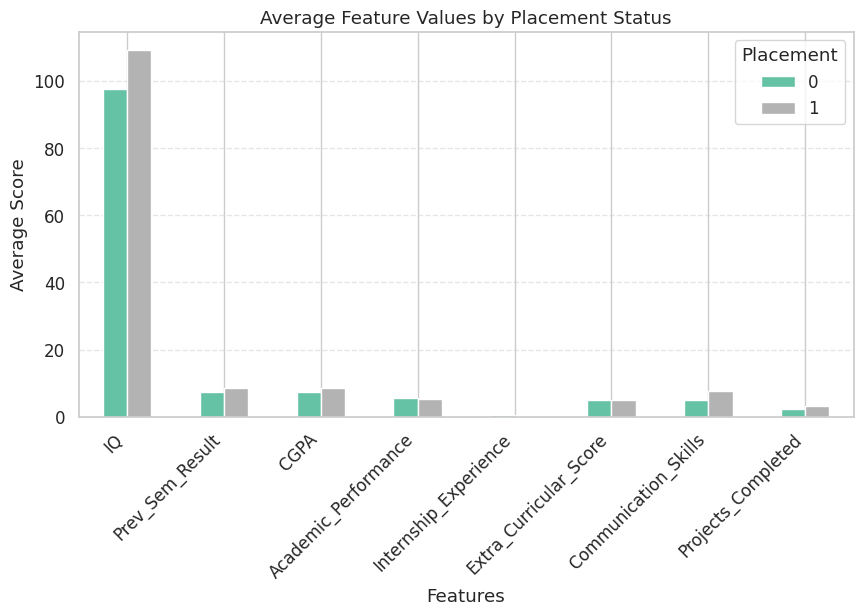

In [ ]:
# Comparing average values of all numeric features between placed and not placed students
# This helps visualize which attributes are generally higher for placed students

avg_features = df.groupby('Placement').mean(numeric_only=True)
avg_features.T.plot(kind='bar', figsize=(10, 5), colormap='Set2')
plt.title("Average Feature Values by Placement Status")
plt.ylabel("Average Score")
plt.xlabel("Features")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# 🧠 Technical Summary
This analysis explored how various academic and personal factors influence student placement outcomes.

### **1. Data Overview**

The dataset included both numeric and categorical features such as CGPA, IQ, Communication Skills, Projects Completed, Internship Experience, and Placement Status.
Categorical variables were converted into numeric form for analysis (e.g., Yes = 1, No = 0).

### **2. Placement Distribution**

The pie chart revealed that a smaller proportion of students were placed compared to those who weren’t — suggesting potential areas of improvement in skill or academic performance.

### **3. Correlation Analysis**

Two correlation analyses were performed:

Numeric Feature Correlation (Heatmap 1):
Explored relationships among numeric features only (excluding Placement).
Strong internal relationships were found between CGPA and Academic Performance, as well as IQ and Communication Skills.

Placement Correlation (Bar Plot):
Assessed how each numeric variable relates directly to Placement. </br>
🔹 Communication Skills, CGPA, and Previous Semester Result, followed by IQ and Projects Completed, showed the strongest positive correlations with placement likelihood. </br>
🔹 Internship Experience and Extra-Curricular Activities had weak or negligible correlations with placement outcomes.


### **4. Scatter Plot Insights**

Scatter plots between:

Communication Skills vs CGPA, and

Extra-Curricular Score vs Academic Performance
showed clear separations in placement outcomes, emphasizing that high CGPA and better communication skills improve placement chances.

### **5. Internship & CGPA Interaction**

The heatmap of CGPA range vs Internship Experience demonstrated that students with higher CGPA had better placement rates, regardless of internship experience. However, internships provided a slight additional edge in some medium-CGPA cases.

### **6. Overall Feature Averages**

The bar chart of average feature values by placement status confirmed consistent trends — placed students scored higher across most academic and skill-based dimensions.
****
# **✅ Final Insights**


Key Drivers of Placement: Communication Skills, CGPA, Previous Results, IQ, Projects Completed

Less Impactful Factors: Internship Experience, Extra-Curricular Activities

Strategic Focus: Improving communication skills and maintaining academic performance may significantly enhance placement prospects.
